<a href="https://colab.research.google.com/github/sivasaikiranakula/projects/blob/main/CarPrices_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

NameError: name 'y_test' is not defined

In [ ]:
# Define a threshold (e.g., ±5%)
threshold = 0.05

# Calculate the percentage of predictions within the threshold
percentage_within_threshold = ((y_test - y_pred).abs() <= threshold * y_test).mean()

print("Accuracy (within ±{}%): {:.2f}%".format(threshold * 100, percentage_within_threshold * 100))


Accuracy (within ±5.0%): 16.91%


In [ ]:
from sklearn.metrics import precision_score, fbeta_score

In [ ]:
threshold = 50000

In [ ]:
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

In [ ]:
precision = precision_score(y_test_binary, y_pred_binary)


NameError: name 'precision_score' is not defined

In [ ]:
f2 = fbeta_score(y_test_binary, y_pred_binary, beta=2)

In [ ]:
print("Precision:", precision)
print("F2 Score:", f2)

Precision: 0.7945619335347432
F2 Score: 0.5391553915539156


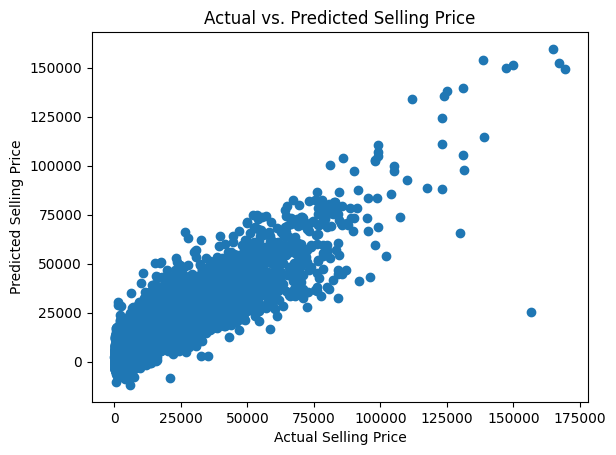

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Price')
plt.show()

In [ ]:
df1 = 'cleaned_Car_prices.csv'
data = pd.read_csv('cleaned_Car_prices.csv')


In [ ]:
X = data[['year', 'make', 'model', 'trim', 'body', 'transmission', 'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'mmr']]
y = data['sellingprice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
categorical_features = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'condition', 'color', 'interior', 'seller']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['make', 'model', 'trim',
                                                   'body', 'transmission',
                                                   'state', 'condition',
                                                   'color', 'interior',
                                                   'seller'])])),
                ('regressor', LinearRegression())])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Precision:", precision)
print("F2 Score:", f2)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Precision: 0.7945619335347432
F2 Score: 0.5391553915539156
Mean Squared Error: 16205464.2805053


In [ ]:
recall = recall_score(y_test_binary, y_pred_binary)

print("Recall:", recall)

Recall: 0.4990512333965844


In [ ]:
df = pd.read_csv('car_prices.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'car_prices.csv'

In [ ]:
cleaned_df = df.dropna()

In [ ]:
cleaned_df.to_csv('cleaned_Car_prices.csv', index=False)